# Statistics (correlation optimized thresholds and impairment level)

In [1]:
from functions.statistics import *
from utilities import *

In [2]:
initial_path = '../data/CreateStudy'
s_json_files = get_json_paths(initial_path, 'S')

In [3]:
result = extract_fields_from_json_files(s_json_files, ['optimal_GMAC_NDH', 'optimal_GMAC_DH', 'min_max_std_GMAC_NDH', 'min_max_std_GMAC_DH', 'optimal_GMAC_NDH_Linus', 'optimal_GMAC_DH_Linus', 'min_max_std_GMAC_NDH_Linus', 'min_max_std_GMAC_DH_Linus', 'ARAT_score', 'FMA-UE_score', 'participant_id', 'dominant_arm_affected'])

In [4]:
PATIENT_ID = result['participant_id']
ARAT = result['ARAT_score']
FMA_UE = result['FMA-UE_score']

optimal_thresholds = result['optimal_GMAC_NDH']
COUNT_THRESHOLD = optimal_thresholds[:,0]
PITCH_THRESHOLD = optimal_thresholds[:,1]
optimal_thresholds_Linus = result['optimal_GMAC_NDH_Linus']
COUNT_THRESHOLD_LINUS = optimal_thresholds_Linus[:,0]
PITCH_THRESHOLD_LINUS = optimal_thresholds_Linus[:,1]

min_max_std_optimal_thresholds_GMAC_NDH = result['min_max_std_GMAC_NDH']
STD_COUNT_NDH, STD_PITCH_NDH = extract_std_from_min_max_std(min_max_std_optimal_thresholds_GMAC_NDH)
min_max_std_optimal_thresholds_GMAC_NDH_Linus = result['min_max_std_GMAC_NDH_Linus']
STD_COUNT_NDH_LINUS, STD_PITCH_NDH_LINUS = extract_std_from_min_max_std(min_max_std_optimal_thresholds_GMAC_NDH_Linus)

DOMINANT_IMPAIRED = result["dominant_arm_affected"]

## Impaired Arm

### Subash GMAC

Linear model coefficients: [-0.04263987]
Linear model intercept: 3.656762629005975
Polynomial model coefficients (degree 2): [ 0.          0.05760355 -0.00122348]
Polynomial model intercept (degree 2): 1.9639050954599133
Pearson Correlation: -0.32879465788650597 p-value: 0.35360202905227084
Spearman Correlation: -0.5443450530086585 p-value: 0.10377582065702175


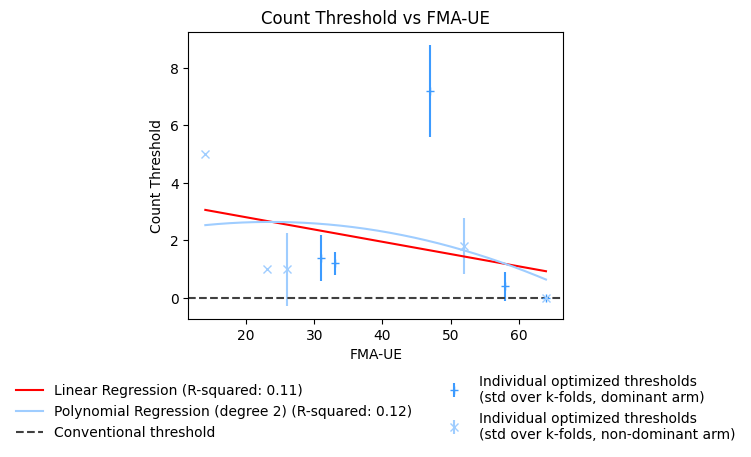

Linear model coefficients: [0.0359044]
Linear model intercept: 41.14073872895165
Polynomial model coefficients (degree 2): [ 0.         -3.09628521  0.03822865]
Polynomial model intercept (degree 2): 94.03548922434385
Pearson Correlation: 0.06777130974339089 p-value: 0.8524292892806553
Spearman Correlation: 0.1580554413568168 p-value: 0.6627622972444478


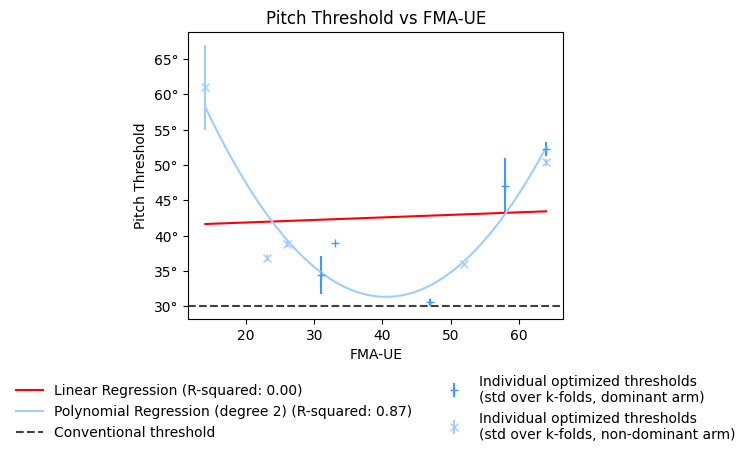

Linear model coefficients: [-0.02640151]
Linear model intercept: 2.628681638950798
Polynomial model coefficients (degree 2): [ 0.          0.28885184 -0.00536041]
Polynomial model intercept (degree 2): 0.5124176513131946
Pearson Correlation: -0.2562369315521449 p-value: 0.47485673090770536
Spearman Correlation: -0.5168219885306926 p-value: 0.1261092733625978


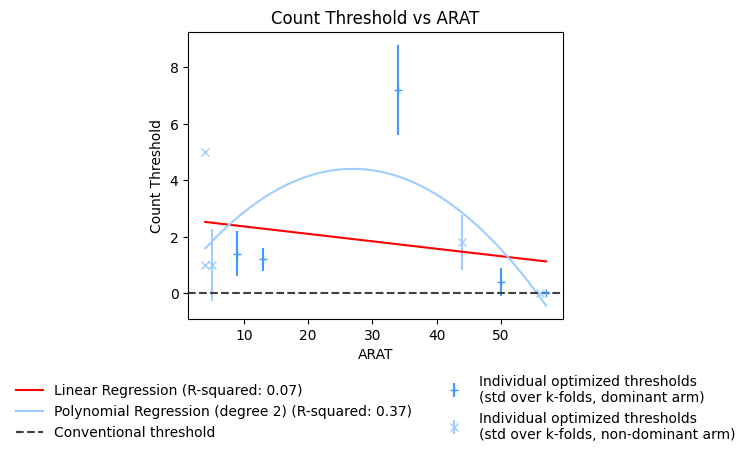

Linear model coefficients: [0.08805075]
Linear model intercept: 40.18979941710955
Polynomial model coefficients (degree 2): [ 0.         -1.50828072  0.02714322]
Polynomial model intercept (degree 2): 50.9058119638286
Pearson Correlation: 0.20918731356552486 p-value: 0.561906633194579
Spearman Correlation: 0.20060882941442132 p-value: 0.5784061446498445


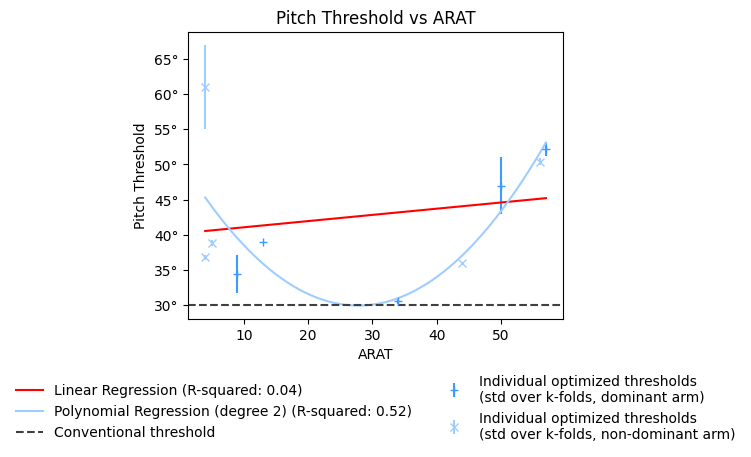

In [5]:
check_regression(FMA_UE, COUNT_THRESHOLD, STD_COUNT_NDH, x_label='FMA-UE', y_label='Count Threshold', title='Count Threshold vs FMA-UE', dominant_impared=DOMINANT_IMPAIRED)
check_regression(FMA_UE, PITCH_THRESHOLD, STD_PITCH_NDH, x_label='FMA-UE', y_label='Pitch Threshold', title='Pitch Threshold vs FMA-UE', dominant_impared=DOMINANT_IMPAIRED)
check_regression(ARAT, COUNT_THRESHOLD, STD_COUNT_NDH, x_label='ARAT', y_label='Count Threshold', title='Count Threshold vs ARAT', dominant_impared=DOMINANT_IMPAIRED)
check_regression(ARAT, PITCH_THRESHOLD, STD_PITCH_NDH, x_label='ARAT', y_label='Pitch Threshold', title='Pitch Threshold vs ARAT', dominant_impared=DOMINANT_IMPAIRED)

### Linus GMAC

Linear model coefficients: [-0.04224606]
Linear model intercept: 3.6605377512221615
Polynomial model coefficients (degree 2): [ 0.          0.06659087 -0.00132836]
Polynomial model intercept (degree 2): 1.8225575737049027
Pearson Correlation: -0.31889275059729 p-value: 0.3691370566824793
Spearman Correlation: -0.5443450530086585 p-value: 0.10377582065702175


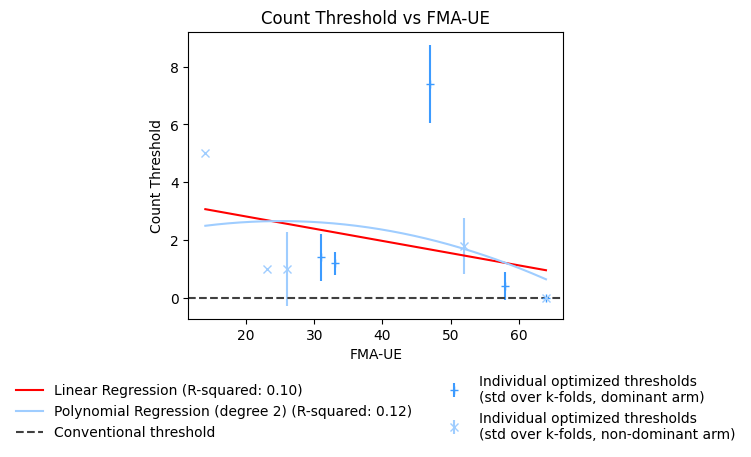

Linear model coefficients: [-0.02586909]
Linear model intercept: 42.76580662683324
Polynomial model coefficients (degree 2): [ 0.         -2.9572982   0.03577835]
Polynomial model intercept (degree 2): 92.27022057446948
Pearson Correlation: -0.0506382100669674 p-value: 0.8895125210874838
Spearman Correlation: 0.10334394242561099 p-value: 0.7763340602409095


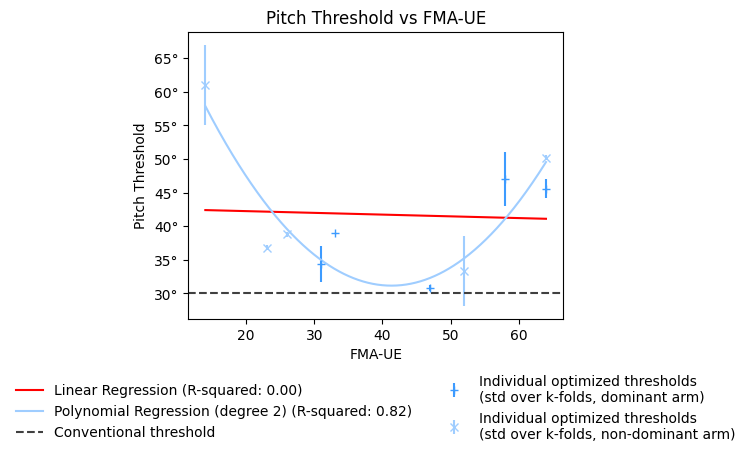

Linear model coefficients: [-0.02612721]
Linear model intercept: 2.6411109206240355
Polynomial model coefficients (degree 2): [ 0.          0.29905887 -0.0055293 ]
Polynomial model intercept (degree 2): 0.458169489208597
Pearson Correlation: -0.24823070570089362 p-value: 0.48923558348680274
Spearman Correlation: -0.5168219885306926 p-value: 0.1261092733625978


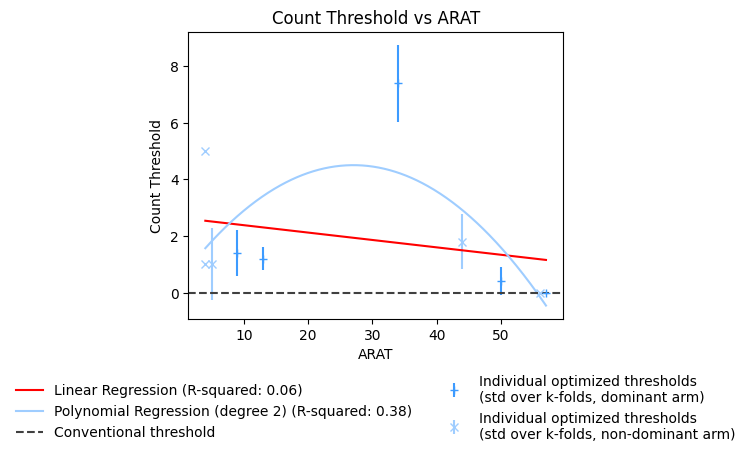

Linear model coefficients: [0.03638779]
Linear model intercept: 40.695696896965536
Polynomial model coefficients (degree 2): [ 0.         -1.40574231  0.02452126]
Polynomial model intercept (degree 2): 50.376571171994385
Pearson Correlation: 0.08965137700189857 p-value: 0.8054562538194039
Spearman Correlation: 0.12766016417281356 p-value: 0.7252501396569361


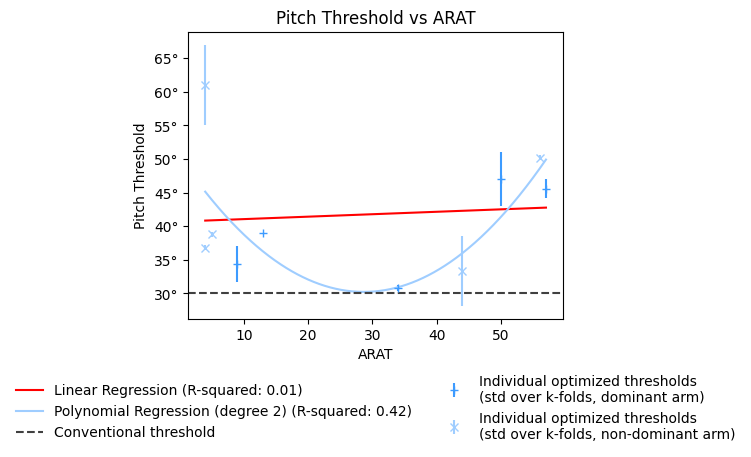

In [6]:
# conventional threshold Line doesn't make much sense here since the conventional thresholds are intended for the Subash functional space definition of GMAC
check_regression(FMA_UE, COUNT_THRESHOLD_LINUS, STD_COUNT_NDH_LINUS, x_label='FMA-UE', y_label='Count Threshold', title='Count Threshold vs FMA-UE', dominant_impared=DOMINANT_IMPAIRED)
check_regression(FMA_UE, PITCH_THRESHOLD_LINUS, STD_PITCH_NDH_LINUS, x_label='FMA-UE', y_label='Pitch Threshold', title='Pitch Threshold vs FMA-UE', dominant_impared=DOMINANT_IMPAIRED)
check_regression(ARAT, COUNT_THRESHOLD_LINUS, STD_COUNT_NDH_LINUS, x_label='ARAT', y_label='Count Threshold', title='Count Threshold vs ARAT', dominant_impared=DOMINANT_IMPAIRED)
check_regression(ARAT, PITCH_THRESHOLD_LINUS, STD_PITCH_NDH_LINUS, x_label='ARAT', y_label='Pitch Threshold', title='Pitch Threshold vs ARAT', dominant_impared=DOMINANT_IMPAIRED)

## Healthy Arm

In [7]:
optimal_thresholds = result['optimal_GMAC_DH']
COUNT_THRESHOLD_HEALTHY = optimal_thresholds[:,0]
PITCH_THRESHOLD_HEALTHY = optimal_thresholds[:,1]
optimal_thresholds_Linus = result['optimal_GMAC_DH_Linus']
COUNT_THRESHOLD_LINUS_HEALTHY = optimal_thresholds_Linus[:,0]
PITCH_THRESHOLD_LINUS_HEALTHY = optimal_thresholds_Linus[:,1]

min_max_std_optimal_thresholds_GMAC_DH = result['min_max_std_GMAC_DH']
STD_COUNT_DH, STD_PITCH_DH = extract_std_from_min_max_std(min_max_std_optimal_thresholds_GMAC_DH)
min_max_std_optimal_thresholds_GMAC_DH_Linus = result['min_max_std_GMAC_DH_Linus']
STD_COUNT_DH_LINUS, STD_PITCH_DH_LINUS = extract_std_from_min_max_std(min_max_std_optimal_thresholds_GMAC_DH_Linus)

## Check distribution of individual optimal thresholds

In [8]:
import numpy as np
def extract_dominant_hand_thresholds(count_threshold: np.ndarray, count_threshold_healthy: np.ndarray, pitch_threshold: np.ndarray, pitch_threshold_healthy: np.ndarray, dominant_impaired: np.ndarray):
    count_threshold_dominant_hand = np.where(dominant_impaired, count_threshold, count_threshold_healthy)
    pitch_threshold_dominant_hand = np.where(dominant_impaired, pitch_threshold, pitch_threshold_healthy)
    count_threshold_nondominant_hand = np.where(dominant_impaired, count_threshold_healthy, count_threshold)
    pitch_threshold_nondominant_hand = np.where(dominant_impaired, pitch_threshold_healthy, pitch_threshold)
    
    return count_threshold_dominant_hand, pitch_threshold_dominant_hand, count_threshold_nondominant_hand, pitch_threshold_nondominant_hand

In [9]:
COUNT_THRESHOLD_DOMINANT_HAND, ELEVATION_THRESHOLD_DOMINANT_HAND, COUNT_THRESHOLD_NONDOMINANT_HAND, ELEVATION_THRESHOLD_NONDOMINANT_HAND = extract_dominant_hand_thresholds(COUNT_THRESHOLD, COUNT_THRESHOLD_HEALTHY, PITCH_THRESHOLD, PITCH_THRESHOLD_HEALTHY, DOMINANT_IMPAIRED)

### Subash GMAC

Mean count threshold Affected side: 1.9000000000000004, Mean count threshold Healthy side: 5.499999999999999
Wilcoxon Signed-Rank Test Count:
p-value: 0.12348527214454898
Paired Samples T-Test Count:
p-value: 0.06881395304465567
Mean elevation threshold Affected side: 42.62, Mean elevation threshold Healthy side: 55.86
Wilcoxon Signed-Rank Test Elevation:
p-value: 0.02734375
Paired Samples T-Test Elevation:
p-value: 0.016547390229919037


/Users/linus/Code/imu_processing/.venv/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  res = hypotest_fun_out(*samples, **kwds)
/Users/linus/Code/imu_processing/.venv/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: Sample size too small for normal approximation.
  res = hypotest_fun_out(*samples, **kwds)


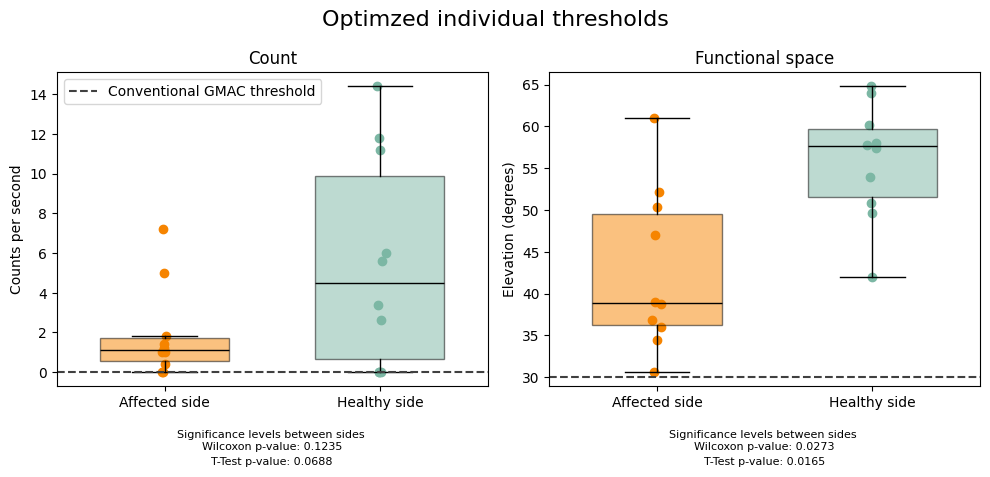

In [10]:
check_distribution(COUNT_THRESHOLD, COUNT_THRESHOLD_HEALTHY, PITCH_THRESHOLD, PITCH_THRESHOLD_HEALTHY) #healthy vs impaired


Mean count threshold Non-dominant side: 2.86, Mean count threshold Dominant side: 4.540000000000001
Wilcoxon Signed-Rank Test Count:
p-value: 0.4838398513935682
Paired Samples T-Test Count:
p-value: 0.4315540580485857
Mean elevation threshold Non-dominant side: 50.36, Mean elevation threshold Dominant side: 48.12
Wilcoxon Signed-Rank Test Elevation:
p-value: 0.845703125
Paired Samples T-Test Elevation:
p-value: 0.7288666540390274


/Users/linus/Code/imu_processing/.venv/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  res = hypotest_fun_out(*samples, **kwds)
/Users/linus/Code/imu_processing/.venv/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: Sample size too small for normal approximation.
  res = hypotest_fun_out(*samples, **kwds)


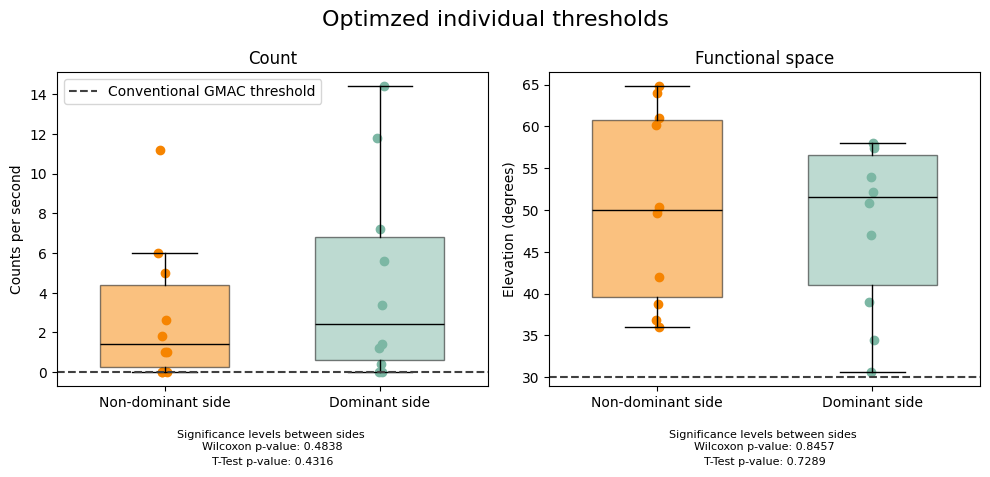

In [11]:
check_distribution(COUNT_THRESHOLD_NONDOMINANT_HAND, COUNT_THRESHOLD_DOMINANT_HAND, ELEVATION_THRESHOLD_NONDOMINANT_HAND, ELEVATION_THRESHOLD_DOMINANT_HAND, x_data_label=['Non-dominant side', 'Dominant side']) #dominant vs nondominant hand

### Linus GMAC

Mean count threshold Affected side: 1.92, Mean count threshold Healthy side: 5.24
Wilcoxon Signed-Rank Test Count:
p-value: 0.16142946236708333
Paired Samples T-Test Count:
p-value: 0.07946619398264253
Mean elevation threshold Affected side: 41.699999999999996, Mean elevation threshold Healthy side: 52.56
Wilcoxon Signed-Rank Test Elevation:
p-value: 0.01953125
Paired Samples T-Test Elevation:
p-value: 0.013356888999904228


/Users/linus/Code/imu_processing/.venv/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  res = hypotest_fun_out(*samples, **kwds)
/Users/linus/Code/imu_processing/.venv/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: Sample size too small for normal approximation.
  res = hypotest_fun_out(*samples, **kwds)


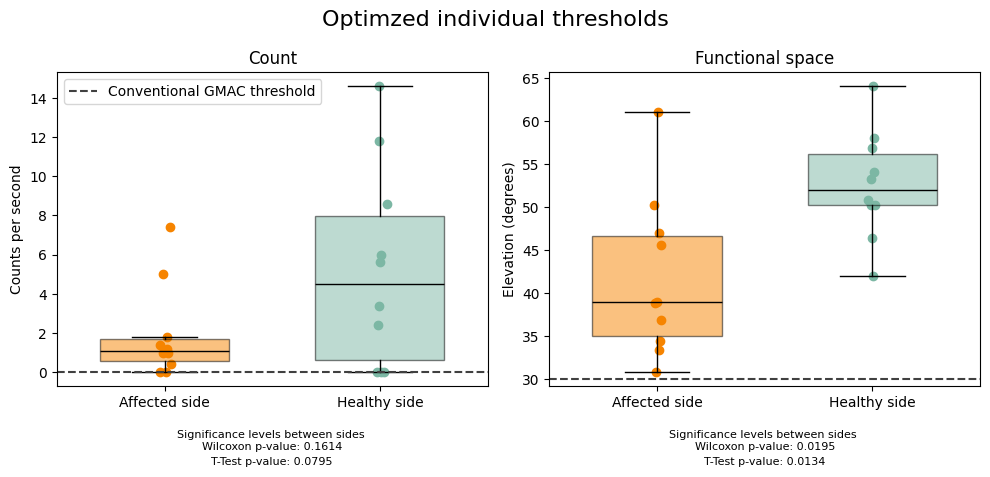

In [12]:
# conventional threshold Line doesn't make much sense here since the conventional thresholds are intended for the Subash functional space definition of GMAC
check_distribution(COUNT_THRESHOLD_LINUS, COUNT_THRESHOLD_LINUS_HEALTHY, PITCH_THRESHOLD_LINUS, PITCH_THRESHOLD_LINUS_HEALTHY)